<h1><center><font size=8>AIML - Project 4 - Travel Package Purchase Prediction</center></font></h1>
<center><img src="https://as2.ftcdn.net/v2/jpg/03/73/95/49/1000_F_373954911_c47XMx3TxQUKQEfQzbkus1cPBuHccS34.jpg" width="400" height="300"></center>


## Problem Statement

### Context:

As a Data Scientist at "Visit with us" travel company has to analyze the customers' data and information to provide recommendations to the Policy Maker and build a model to predict the potential customer who is going to purchase the newly introduced travel package. The model will be built to make predictions before a customer is contacted.


### Objective:
To predict which customer is more likely to purchase the newly introduced travel package.

### Data Description:

Customer details:

 - CustomerID: Unique customer ID
 - ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
 - Age: Age of customer
 - TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
 - CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3. It's the city the customer lives in.
 - Occupation: Occupation of customer
 - Gender: Gender of customer
 - NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
 - PreferredPropertyStar: Preferred hotel property rating by customer
 - MaritalStatus: Marital status of customer
 - NumberOfTrips: Average number of trips in a year by customer
 - Passport: The customer has a passport or not (0: No, 1: Yes)
 - OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
 - NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
 - Designation: Designation of the customer in the current organization
 - MonthlyIncome: Gross monthly income of the customer

Customer interaction data: 

 - PitchSatisfactionScore: Sales pitch satisfaction score
 - ProductPitched: Product pitched by the salesperson
 - NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
 - DurationOfPitch: Duration of the pitch by a salesperson to the customer


## Importing necessary libraries

**Importing required libraries.**

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np   
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

## Reading the dataset

In [2]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [58]:
#Reading data from excel and copying in another dataframe
originalData = pd.read_excel("/content/drive/My Drive/Python Learning/Projects/Project4/Tourism.xlsx")
data = originalData

## Overview of the dataset

### View the first 5 rows of the dataset

In [4]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### Check data types and number of non-null values for each column

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

- We can see that there are total of 19 columns and 4888 rows in the dataset.
- Column datatypes are integer, float or object.
- Age, TypeofContact,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome columns have missing values.

In [6]:
# Find if there are any duplicates in dataset
data.duplicated().sum()

0

 - No duplicates in data.

In [7]:
data.isna().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

- There are few columns with missing values. Age, DurationOfPitch, MonthlyIncome and NumberOfTrips have more missing values. 

### Summary of the dataset

In [8]:
# Statistical analysis
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


- `ProdTaken`, `Passport` and `OwnCar` has 0 and 1 as min and max indicating these are boolean value columns.
- `MonthlyIncome` seems to be little right skewed with max value is much higher then 75%.
- `DurationOfPitch` and `NumberOfTrips` is right skewed. 
- `Age` range is from 18 to 61. 

### Number of unique values in each column

In [10]:
data.nunique()

CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

- We can drop 'CustomerID' column as this indicates unique identifier for data
- `TypeofContact`, `CityTier`, `Occupation`, `Gender`,`MaritalStatus` are few columms which seems like category columns. 

### Number of observations in each category

In [9]:
# Get  columns whose data type is object i.e. string
objectColumns = data.dtypes[data.dtypes == np.object]
# list of columns whose data type is object i.e. string
listOfobjectColumns = list(objectColumns.index)
print(listOfobjectColumns)

['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


In [10]:
#Qualitfied few objects columns and added some nueric boolean columns which seens like categories to get unique value counts 
cat_cols=['ProdTaken','TypeofContact','CityTier', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Passport', 'OwnCar', 'Designation']

for column in cat_cols:
    print(data[column].value_counts())
    print('-'*50)

0    3968
1     920
Name: ProdTaken, dtype: int64
--------------------------------------------------
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
--------------------------------------------------
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
--------------------------------------------------
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
--------------------------------------------------
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
--------------------------------------------------
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
--------------------------------------------------
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
--------------------------------------------------
0    346

In [11]:
data['ProdTaken'].value_counts(normalize=True)

0    0.811784
1    0.188216
Name: ProdTaken, dtype: float64

- Dependent variable `ProdTaken` has 81% data as Product not taken. There may be some data imbalance due to less number of records with product taken as true. 
- There are more Self Enquiries then company invitations for travel packages. - - Gender data may need fix with assumption that "Female" and "Fe Male" reprents same values.
- Basic and Deluxe have more product pitched values compare to other products. - There are more participation from Married status then others. 
- Designations have 5 different categories. 

## <a name='link2'>Exploratory Data Analysis (EDA) Summary</a>

**Common funtions to carry out the EDA.**

In [12]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [59]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

##### **Processing Columns**

In [59]:
# CustomerID is primary key from the data. This can be dropped for further analysis.
data.drop(['CustomerID'],axis=1,inplace=True) 

In [60]:
#Changing 'Fe Male' to 'Female' in dataset
data['Gender'] = data['Gender'].replace(['Fe Male'], 'Female')

In [61]:
print(data['Gender'].value_counts())

Male      2916
Female    1972
Name: Gender, dtype: int64


### Univariate analysis

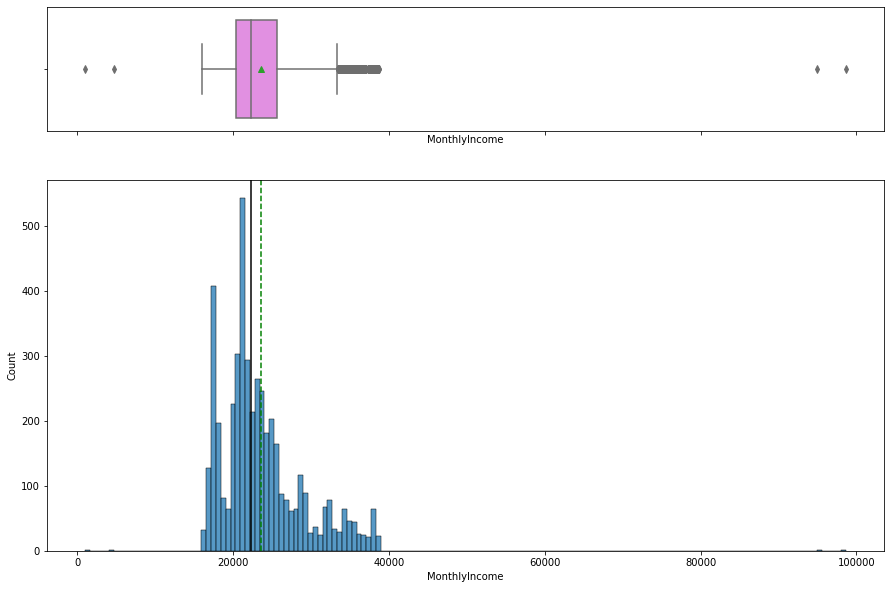

In [63]:
histogram_boxplot(data,'MonthlyIncome')

- MonthlyIncome data is skewed to right. There are outliers for monthlyIncome. 

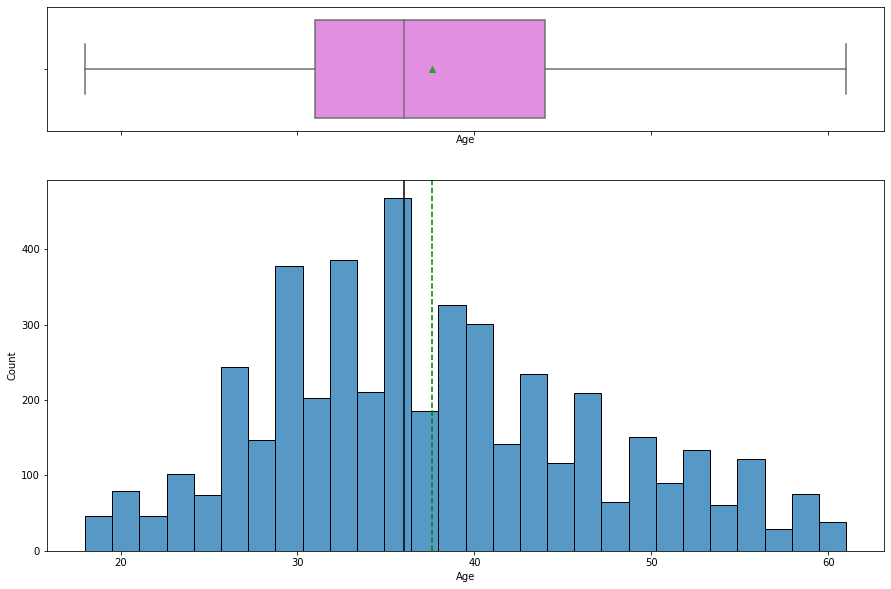

In [64]:
histogram_boxplot(data,'Age')

- Age seems to be normalize indicating all the age groups are considered for offering travel packages. 

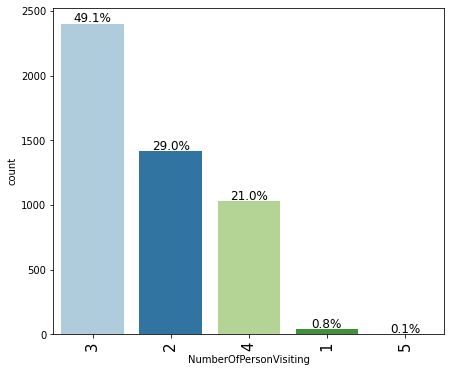

In [65]:
labeled_barplot(data,'NumberOfPersonVisiting',perc=True)

- Half the data involves at least 3 person visting using the travel package. Very few families with 5 people are using the travel package. 

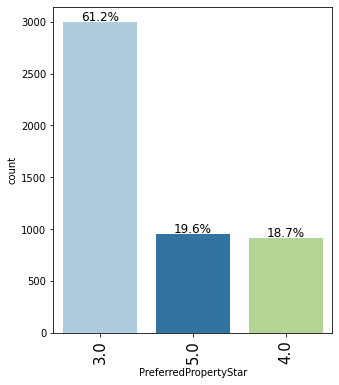

In [66]:
labeled_barplot(data,'PreferredPropertyStar',perc=True)

- 3 start properties seems to be more common.

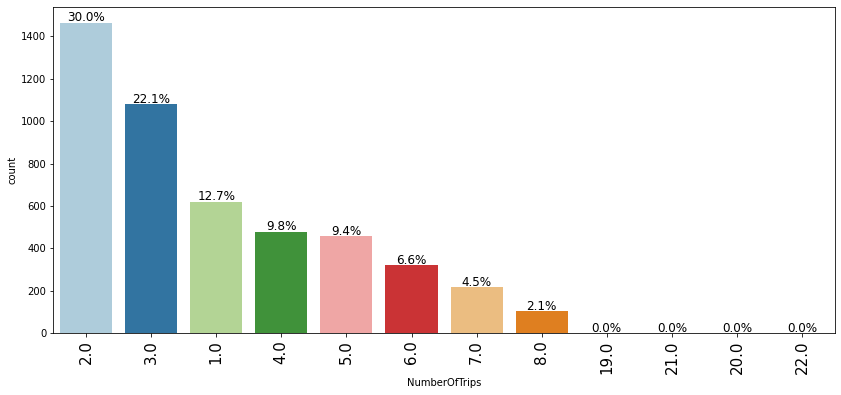

In [67]:
labeled_barplot(data,'NumberOfTrips',perc=True)

- At least 30% participants have at least taken 2 trip. There are good number of returning customers for this company which is good sign.

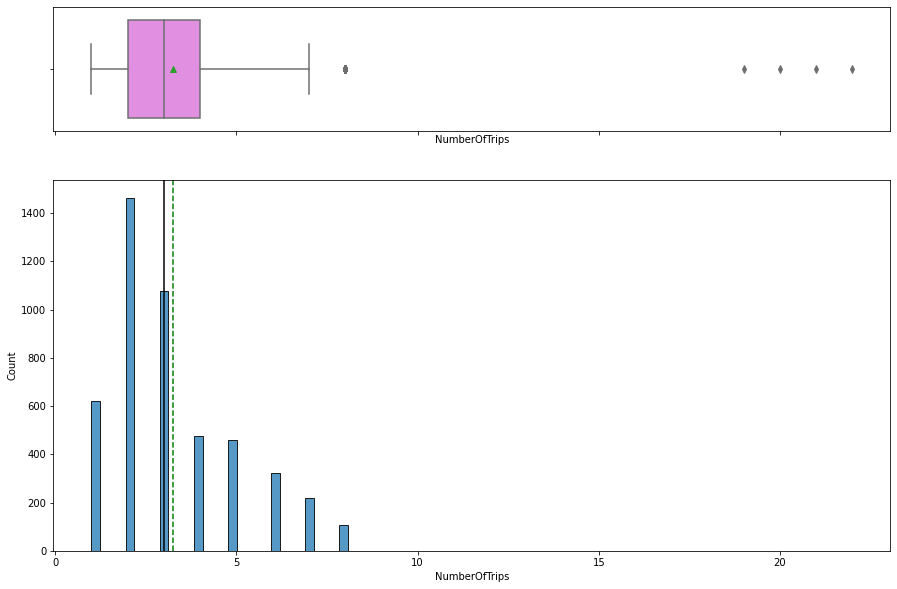

In [68]:
histogram_boxplot(data,'NumberOfTrips')

- NumberOfTrips seems to have some outliers which doesn't fit with normal data. But there is very good chance that some people with more age might have taken more trips.

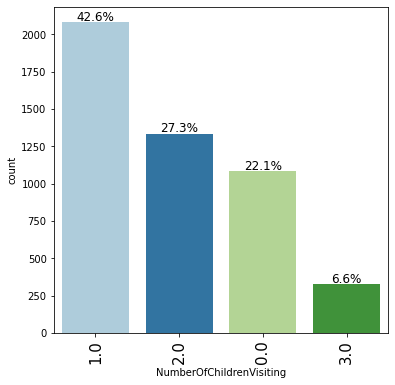

In [69]:
labeled_barplot(data,'NumberOfChildrenVisiting',perc=True)

- Most customers are travelling with at least one child. 22% customers visited without any child.

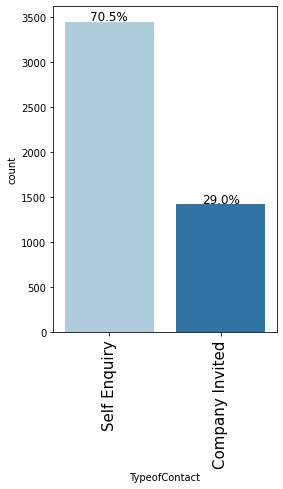

In [70]:
labeled_barplot(data,'TypeofContact',perc=True)

- There are more self inquiries comapred ro company invited. This is good sign for company as this may have triggered from mounth publicity from existing customers.

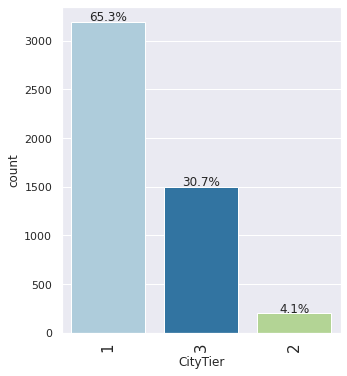

In [37]:
labeled_barplot(data,'CityTier',perc=True)

- Tier 1 cities has more customers compare to Tier 2 and Tier3. 

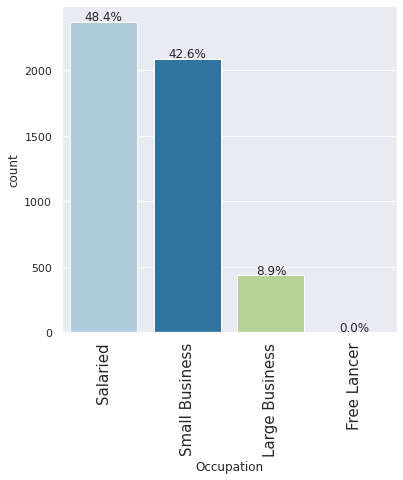

In [38]:
labeled_barplot(data,'Occupation',perc=True)

- Salaried and Small business individuals are main customers opting for travel packges. Less participation form Large Business.  

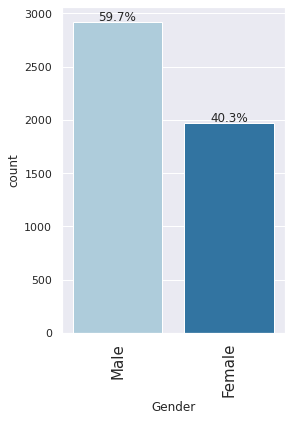

In [72]:
labeled_barplot(data,'Gender',perc=True)

- Male customers have more participation than Female.  

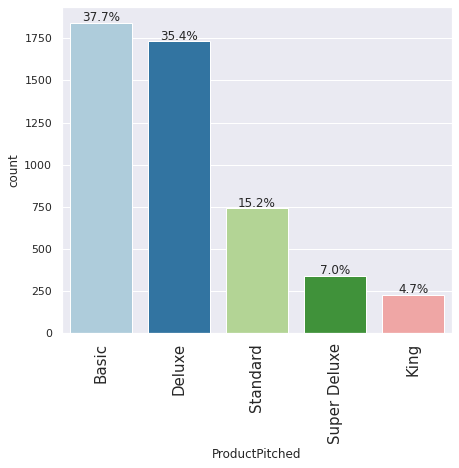

In [40]:
labeled_barplot(data,'ProductPitched',perc=True)

- Basic and Deluxe seems to be more popular packages then Standard, Super Deluxe and King.  

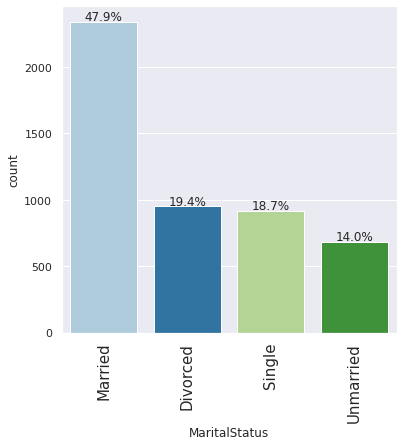

In [41]:
labeled_barplot(data,'MaritalStatus',perc=True)

- Married cutomers have more participation than other categories.  

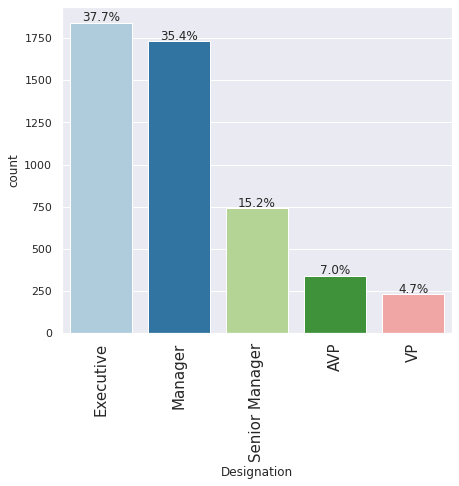

In [42]:
labeled_barplot(data,'Designation',perc=True)

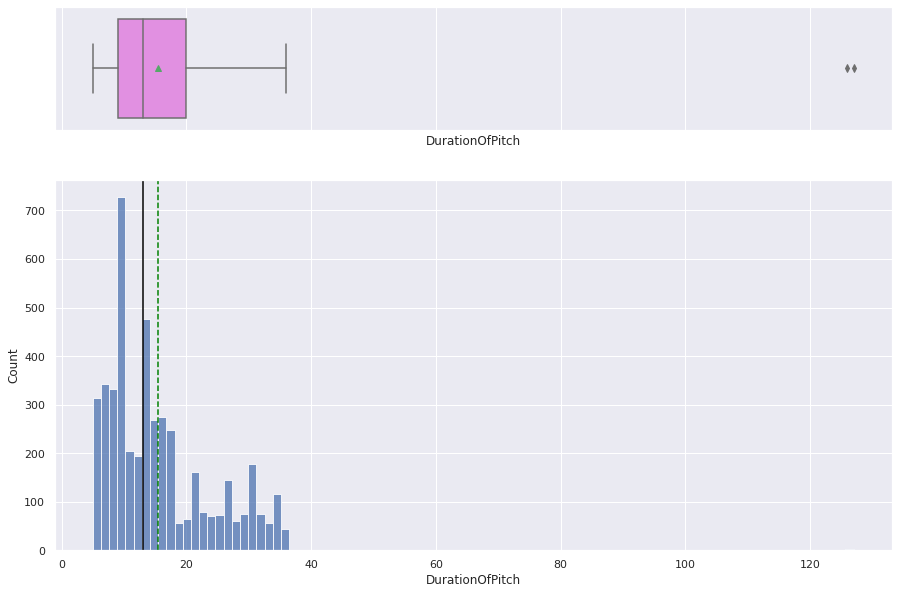

In [80]:

histogram_boxplot(data,'DurationOfPitch')

- DurationOfPitch which is one important aspect to sell the package seems to be right skewed and have some outliers. 

### Bivariate analysis

**Correlation Check**

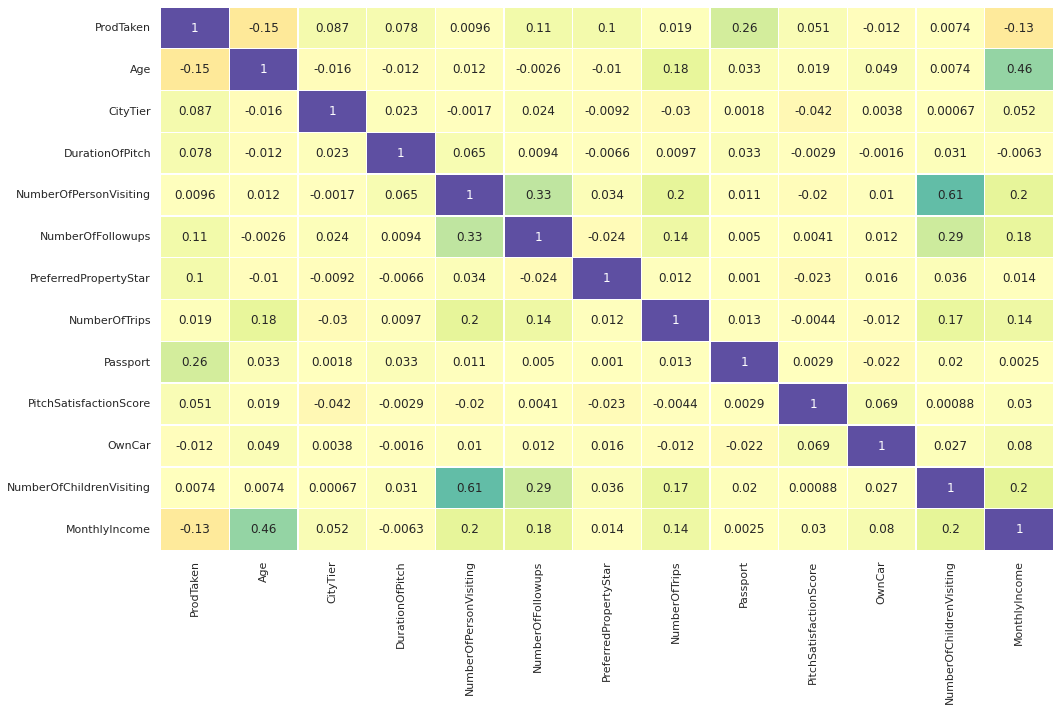

In [71]:
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="Spectral")
plt.show()

- Correlation metrics is not giving enough information regarding fields which can be used decisevely to decide customers buying packages. 
- Amongst all fields, Passport seems to have some high co relation with ProdTaken.

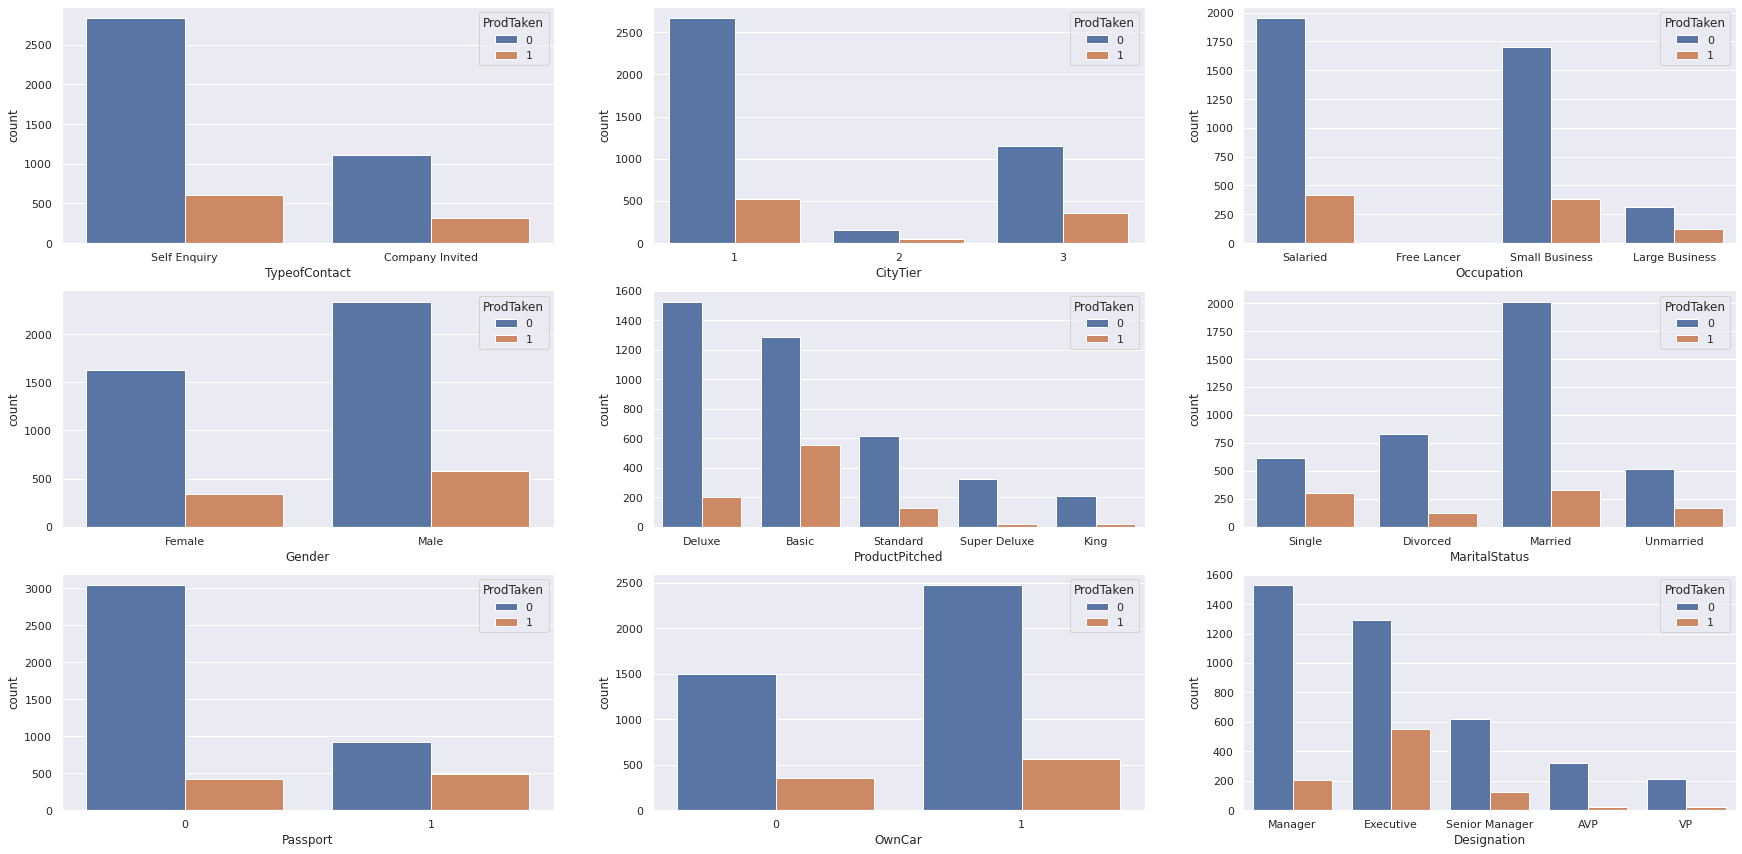

In [74]:
cat_cols=['TypeofContact','CityTier', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Passport', 'OwnCar', 'Designation']
plt.figure(figsize=(30,20))
pos = 1
for i in cat_cols:
    plt.subplot(4, 3, pos)
    sns.countplot(x=data[i], hue="ProdTaken", data=data)
    pos += 1

- This chart gives some idea on what attribute has some influence of ProdTaken.  
- Basic prodcut category seems to have higher rate of acceptance based on Product Pitched. 
- Percentage of Executive designated customers opting for package is higher compared to others. 

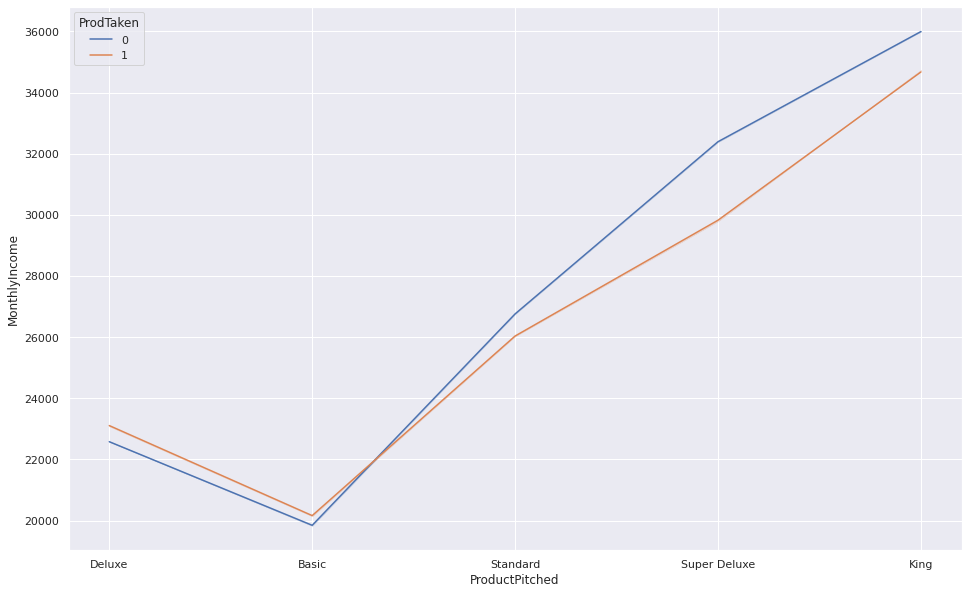

In [58]:

sns.lineplot(data=data, x='ProductPitched', y='MonthlyIncome',hue='ProdTaken', ci=False)
plt.show()

- Super Deluxe and King packages acceptance between higher MonthlyIncome group.

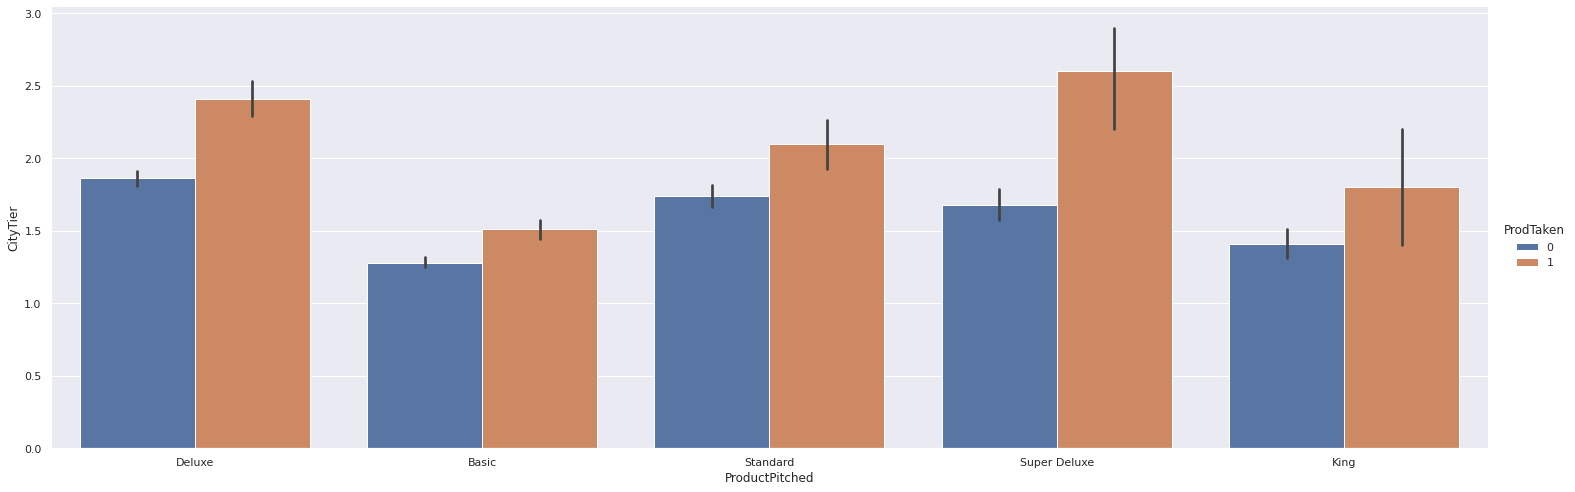

In [174]:
sns.set(rc={'figure.figsize':(21,7)})
sns.catplot(x="ProductPitched", y="CityTier", kind="bar",hue='ProdTaken', data=data, height=7, aspect=3);

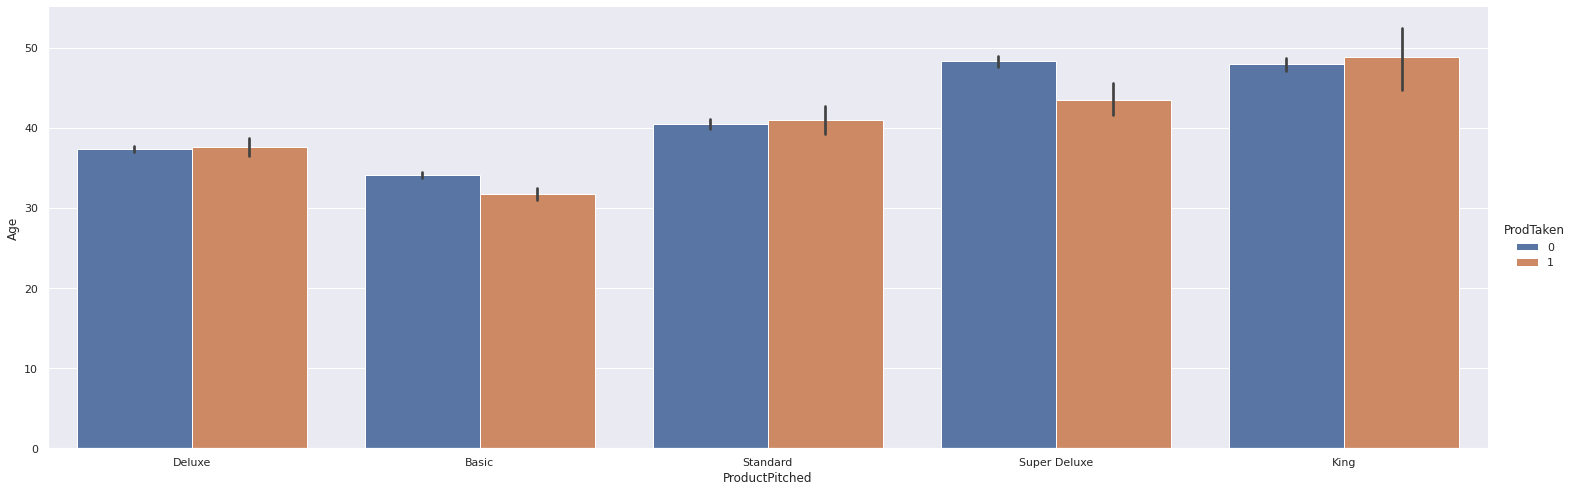

In [171]:
sns.set(rc={'figure.figsize':(21,7)})
sns.catplot(x="ProductPitched", y="Age", kind="bar",hue='ProdTaken', data=data, height=7, aspect=3);

- Super Deluxe and King packages acceptance between higher Age group.

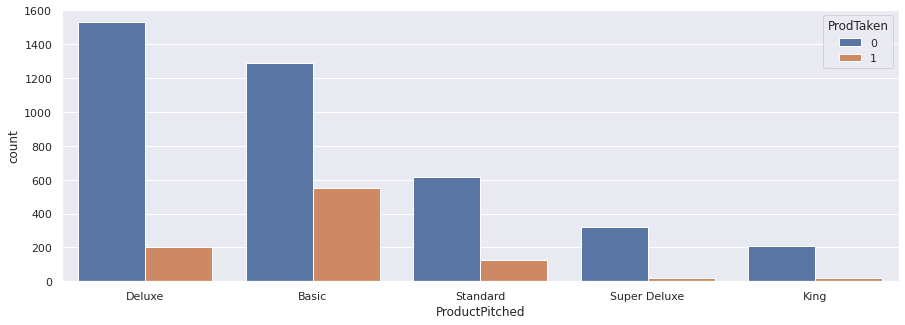

In [75]:
plt.figure(figsize=(15,5))
sns.countplot(data=data,x='ProductPitched',hue='ProdTaken')
plt.show()

### <a id='link1'>Summary of EDA</a>

**Data Cleaning:**

- The `ProdTaken` is target variable.
- `Gender` has 'Fe Male' and 'Female' as 2 values. Assuming both meant same, replaced 'Fe Male' with 'Female'
- `MonthlyIncome` seems to have good number of outliers which may need treatment. 
- Data has missing values. Missing values may need treatment.

**Observations from EDA:**

- At least 30% participants have at least taken 2 trip. 
- Most customers are travelling with at least one child. 22% customers visited without any child.
- There are more self inquiries compared to company invited. 
- Tier 1 > Tier3 > Tier2. Tier 1 cities has more customers compare to Tier 2 and Tier3. More focus may be needed to attract customers from Tier 2 and Tier3.
- Salaried and Small business individuals are main customers opting for travel packges. Less participation form Large Business. 
- Basic and Deluxe seems to be more popular packages then Standard, Super Deluxe and King.  
- Married cutomers have more participation than other categories.  
- DurationOfPitch which is one important aspect to sell the package seems to be right skewed and have some outliers. 
- Correlation metrics is not giving enough information regarding fields which can be used decisevely to decide customers buying packages. Amongst all fields, Passport seems to have some high co relation with ProdTaken.
- Basic product category seems to have higher rate of acceptance based on Product Pitched. 
- Percentage of Executive designated customers opting for package is higher compared to others. 
- Super Deluxe and King packages acceptance between higher MonthlyIncome and Age group.

## Data Preprocessing

### Missing Value Treatment

In [62]:
# Finding all missing values
data.isna().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
ProdTaken                     0
MaritalStatus                 0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

In [63]:
# Analyzing missing values for MonthlyIncome. 
data.groupby(['Designation']).mean().sort_values(by='MonthlyIncome', ascending=False) # GroupBy and sort on a column to find average/min/max

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
Designation,,,,,,,,,,,,,
VP,0.086957,48.065217,1.443478,12.100000,2.847826,3.804348,3.478261,3.344595,0.260870,3.226087,0.721739,1.358852,35878.947826
AVP,0.058480,48.026316,1.730994,16.230994,2.845029,3.576023,3.578947,3.589041,0.304094,3.356725,0.701754,1.073333,32241.046784
Senior Manager,0.167116,40.581646,1.800539,15.986505,2.920485,3.791105,3.647773,3.317139,0.283019,3.061995,0.652291,1.178138,26637.749326
Manager,0.117783,37.382193,1.928406,15.935839,2.891455,3.701765,3.560370,3.282081,0.277136,3.006928,0.610855,1.177354,22643.157629
Executive,0.299674,33.054181,1.349620,15.194834,2.929967,3.693822,3.585551,3.096353,0.308360,3.081433,0.588491,1.199348,19939.922507


In [64]:
# Replace Monthly income missing values based on designation mean.
data[["MonthlyIncome"]] = data.groupby(["Designation"])[["MonthlyIncome"]].transform(lambda x: x.fillna(x.mean()))

In [65]:
# Replace Age missing values using mean
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [66]:
#DurationOfPitch missing values can be replaced with median value.
data['DurationOfPitch'] = data['DurationOfPitch'].fillna(data['DurationOfPitch'].median())

In [67]:
data['PreferredPropertyStar'] = data['PreferredPropertyStar'].fillna(data['PreferredPropertyStar'].mean())

In [68]:
# Check Mileage empty rows. 
data[data['NumberOfTrips'].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
2469,0,54.0,Self Enquiry,1,12.0,Salaried,Female,3,4.0,King,3.0,Married,NaN,0,5,0,2.0,VP,37772.0
2473,0,47.0,Self Enquiry,3,9.0,Small Business,Female,3,4.0,King,5.0,Single,NaN,0,2,0,2.0,VP,37625.0
2506,0,51.0,Self Enquiry,1,14.0,Small Business,Female,3,5.0,King,3.0,Married,NaN,1,4,1,2.0,VP,37418.0
2549,0,60.0,Company Invited,2,9.0,Salaried,Female,3,5.0,King,3.0,Divorced,NaN,0,2,1,2.0,VP,37522.0
2550,0,51.0,Company Invited,1,7.0,Salaried,Female,4,4.0,King,4.0,Divorced,NaN,1,2,0,3.0,VP,36850.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4836,1,45.0,Self Enquiry,3,16.0,Salaried,Male,4,5.0,Basic,5.0,Married,NaN,0,1,1,3.0,Executive,37868.0
4850,1,46.0,Self Enquiry,3,8.0,Salaried,Male,4,5.0,Deluxe,5.0,Married,NaN,0,4,1,3.0,Manager,36739.0
4851,1,40.0,Self Enquiry,1,9.0,Salaried,Female,4,4.0,Basic,5.0,Married,NaN,1,1,1,1.0,Executive,35801.0
4868,1,43.0,Company Invited,2,15.0,Salaried,Female,4,5.0,Basic,3.0,Married,NaN,0,5,1,2.0,Executive,36539.0


In [69]:
# Most of category column missing values can be treated with mode. 
data['NumberOfTrips'] = data['NumberOfTrips'].fillna(data['NumberOfTrips'].mode()[0])
data['NumberOfChildrenVisiting'] = data['NumberOfChildrenVisiting'].fillna(data['NumberOfChildrenVisiting'].mode()[0])
data['NumberOfFollowups'] = data['NumberOfFollowups'].fillna(data['NumberOfFollowups'].mode()[0])
data['TypeofContact'] = data['TypeofContact'].fillna(data['TypeofContact'].mode()[0])

In [70]:
data.isna().sum().sort_values(ascending=False)

ProdTaken                   0
PreferredPropertyStar       0
Designation                 0
NumberOfChildrenVisiting    0
OwnCar                      0
PitchSatisfactionScore      0
Passport                    0
NumberOfTrips               0
MaritalStatus               0
ProductPitched              0
Age                         0
NumberOfFollowups           0
NumberOfPersonVisiting      0
Gender                      0
Occupation                  0
DurationOfPitch             0
CityTier                    0
TypeofContact               0
MonthlyIncome               0
dtype: int64

- All the missing values are taken care. 

In [71]:
# saving the dataset with all the missing values treated
data.to_csv('/content/drive/My Drive/Python Learning/Projects/Project4/Tourism_NoMissing.csv',index=False)

### Outlier Detection and Treatment

In [72]:
# Read new file without missing values.
data_noMissingValue = pd.read_csv('/content/drive/My Drive/Python Learning/Projects/Project4/Tourism_NoMissing.csv')
# checking the shape of the data
print(f"There are {data_noMissingValue.shape[0]} rows and {data_noMissingValue.shape[1]} columns.")  # f-string

There are 4888 rows and 19 columns.


In [75]:
data_noMissingValue.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [73]:
data_noMissingValue.isna().sum().sort_values(ascending=False)

ProdTaken                   0
PreferredPropertyStar       0
Designation                 0
NumberOfChildrenVisiting    0
OwnCar                      0
PitchSatisfactionScore      0
Passport                    0
NumberOfTrips               0
MaritalStatus               0
ProductPitched              0
Age                         0
NumberOfFollowups           0
NumberOfPersonVisiting      0
Gender                      0
Occupation                  0
DurationOfPitch             0
CityTier                    0
TypeofContact               0
MonthlyIncome               0
dtype: int64

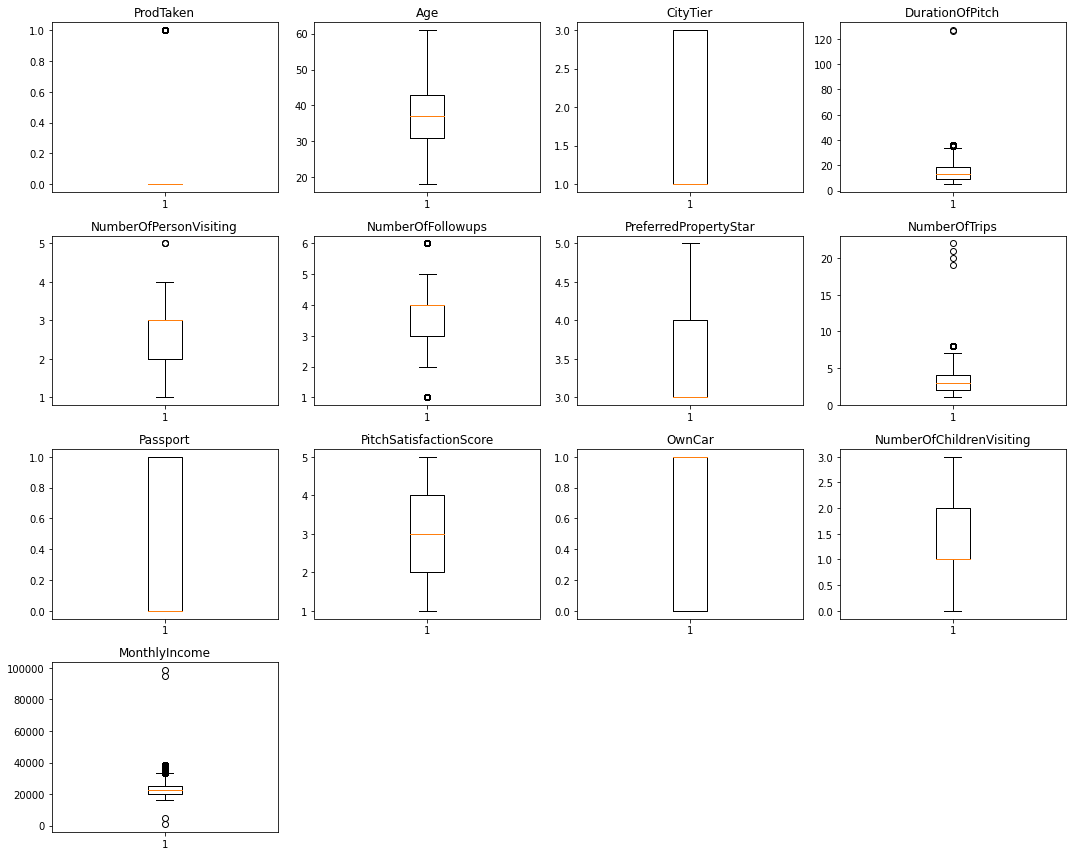

In [74]:
# outlier detection using boxplot
numeric_columns = data_noMissingValue.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data_noMissingValue[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [76]:
# outlier detection using boxplot
columns_with_outliers = ['NumberOfTrips', 'MonthlyIncome']

In [77]:
# to find the 25th percentile and 75th percentile for the numerical columns.
Q1 = data_noMissingValue[columns_with_outliers].quantile(0.25)
Q3 = data_noMissingValue[columns_with_outliers].quantile(0.75)

IQR = Q3 - Q1                   #Inter Quantile Range (75th percentile - 25th percentile)

lower_whisker = Q1 - 1.5*IQR    #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper_whisker = Q3 + 1.5*IQR

In [78]:
# Percentage of outliers in each column
((data_noMissingValue[columns_with_outliers] < lower_whisker) | (data_noMissingValue[columns_with_outliers] > upper_whisker)).sum()/data_noMissingValue.shape[0]*100

NumberOfTrips    2.229951
MonthlyIncome    7.303601
dtype: float64

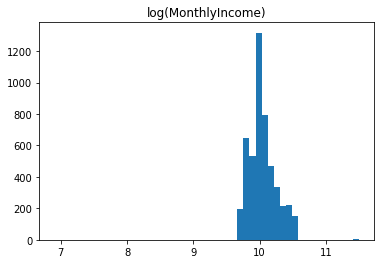

In [79]:
# Checking log transformation for MonthlyIncome. 
plt.hist(np.log(data_noMissingValue['MonthlyIncome'] ), 50)
plt.title('log(MonthlyIncome)')
plt.show()

####**Treating outliers**

We will cap/clip the minimum and maximum value of these columns to the lower and upper whisker value of the boxplot found using  **Q1 - 1.5*IQR** and **Q3 + 1.5*IQR**, respectively.

**Creating a function to floor and cap/clip outliers in a column**

In [80]:
def treat_outliers(df_noMissingValue, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df_noMissingValue[col].quantile(0.25)  # 25th quantile
    Q3 = df_noMissingValue[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1                # Inter Quantile Range (75th perentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # all the values smaller than lower_whisker will be assigned the value of lower_whisker
    # all the values greater than upper_whisker will be assigned the value of upper_whisker
    # the assignment will be done by using the clip function of NumPy
    df_noMissingValue[col] = np.clip(df_noMissingValue[col], lower_whisker, upper_whisker)

    return df_noMissingValue

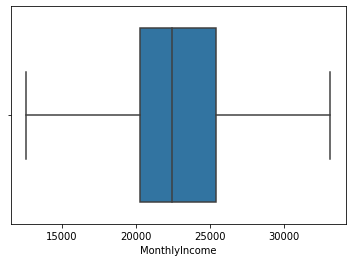

In [81]:
# Treat outliers for MonthlyIncome
data_noMissingValue = treat_outliers(data_noMissingValue,'MonthlyIncome')

# visualizing the column after outlier treatment
sns.boxplot(data=data_noMissingValue,x='MonthlyIncome')
plt.show()

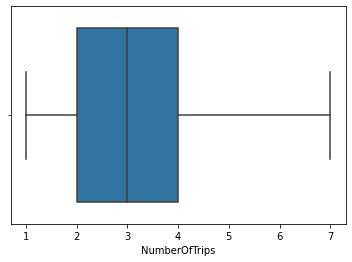

In [82]:
# Treat outliers for NumberOfTrips
data_noMissingValue = treat_outliers(data_noMissingValue,'NumberOfTrips')

# visualizing the column after outlier treatment
sns.boxplot(data=data_noMissingValue,x='NumberOfTrips')
plt.show()

In [83]:
# saving the dataset with all the missing values treated
data_noMissingValue.to_csv('/content/drive/My Drive/Python Learning/Projects/Project4/Tourism__NoOutliers.csv',index=False)

In [84]:
#Save data after treating outliers and missing values. This data will be used for further processing.
data_noMissing_nooutliers = pd.read_csv('/content/drive/My Drive/Python Learning/Projects/Project4/Tourism__NoOutliers.csv')
# checking the shape of the data
print(f"There are {data_noMissing_nooutliers.shape[0]} rows and {data_noMissing_nooutliers.shape[1]} columns.")  # f-string

There are 4888 rows and 19 columns.


In [85]:
data_noMissing_nooutliers.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,0.188216,0.390925,0.000,0.0,0.0,0.00,1.000
Age,4888.0,37.622265,9.098418,18.000,31.0,37.0,43.00,61.000
CityTier,4888.0,1.654255,0.916583,1.000,1.0,1.0,3.00,3.000
DurationOfPitch,4888.0,15.362930,8.316166,5.000,9.0,13.0,19.00,127.000
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.000,2.0,3.0,3.00,5.000
NumberOfFollowups,4888.0,3.711129,0.998271,1.000,3.0,4.0,4.00,6.000
PreferredPropertyStar,4888.0,3.581037,0.795883,3.000,3.0,3.0,4.00,5.000
NumberOfTrips,4888.0,3.168576,1.715676,1.000,2.0,3.0,4.00,7.000
Passport,4888.0,0.290917,0.454232,0.000,0.0,0.0,1.00,1.000
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.000,2.0,3.0,4.00,5.000


In [86]:
data_noMissing_nooutliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4888 non-null   float64
 2   TypeofContact             4888 non-null   object 
 3   CityTier                  4888 non-null   int64  
 4   DurationOfPitch           4888 non-null   float64
 5   Occupation                4888 non-null   object 
 6   Gender                    4888 non-null   object 
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4888 non-null   float64
 9   ProductPitched            4888 non-null   object 
 10  PreferredPropertyStar     4888 non-null   float64
 11  MaritalStatus             4888 non-null   object 
 12  NumberOfTrips             4888 non-null   float64
 13  Passport                  4888 non-null   int64  
 14  PitchSat

### Data Preparataion for model building

In [87]:
#Checking distribution for target variable ProdTaken
data_noMissing_nooutliers['ProdTaken'].value_counts(normalize=True)

0    0.811784
1    0.188216
Name: ProdTaken, dtype: float64

In [88]:
# Droppingthe target column
X = data_noMissing_nooutliers.drop('ProdTaken', axis=1)
y = data_noMissing_nooutliers['ProdTaken']

In [89]:
#One Hot encoding
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,...,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,41.000000,3,6.0,3,3.0,3.0,1.0,1,2,1,...,0,0,0,0,1,0,0,1,0,0
1,49.000000,1,14.0,3,4.0,4.0,2.0,0,3,1,...,0,0,0,0,0,0,0,1,0,0
2,37.000000,1,8.0,3,4.0,3.0,7.0,1,3,0,...,0,0,0,0,1,0,1,0,0,0
3,33.000000,1,9.0,2,3.0,3.0,2.0,1,5,1,...,0,0,0,0,0,0,1,0,0,0
4,37.622265,1,8.0,2,3.0,4.0,1.0,0,5,1,...,0,0,0,0,0,0,1,0,0,0


In [90]:
#Checking newly added columns after one hot encoding for categorical data. 
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          4888 non-null   float64
 1   CityTier                     4888 non-null   int64  
 2   DurationOfPitch              4888 non-null   float64
 3   NumberOfPersonVisiting       4888 non-null   int64  
 4   NumberOfFollowups            4888 non-null   float64
 5   PreferredPropertyStar        4888 non-null   float64
 6   NumberOfTrips                4888 non-null   float64
 7   Passport                     4888 non-null   int64  
 8   PitchSatisfactionScore       4888 non-null   int64  
 9   OwnCar                       4888 non-null   int64  
 10  NumberOfChildrenVisiting     4888 non-null   float64
 11  MonthlyIncome                4888 non-null   float64
 12  TypeofContact_Self Enquiry   4888 non-null   uint8  
 13  Occupation_Large B

In [91]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, shuffle=True)

In [92]:
X_train.shape, X_test.shape

((3421, 28), (1467, 28))

- We have 3421 observations in the train set and 1467 observations in the test set.

## Bagging - Model Building and Hyperparameter Tuning

- We'll fit different models on the train data and observe their performance. 
- We'll try to improve that performance by tuning some hyperparameters available for that algorithm.
- We'll use GridSearchCv for hyperparameter tuning. 
- In these steps we will calculate Accuracy, Recall, Precision and F1 scores in each model and compare values.


In [93]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [94]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    #F1 Score of the model
    train_F1 = metrics.f1_score(y_train,pred_train)
    test_F1 = metrics.f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_F1,test_F1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1 on training set : ",train_F1)
        print("F1 on test set : ",test_F1)
    
    return score_list # returning the list with train and test scores

### Bagging Classifier

In [95]:
bag = BaggingClassifier(random_state=1)
bag.fit(X_train, y_train)

BaggingClassifier(random_state=1)

In [96]:
bag_score=get_metrics_score(bag)

Accuracy on training set :  0.9950306927798889
Accuracy on test set :  0.8991138377641446
Recall on training set :  0.9727564102564102
Recall on test set :  0.5709459459459459
Precision on training set :  1.0
Precision on test set :  0.8894736842105263
F1 on training set :  0.9861900893582454
F1 on test set :  0.6954732510288066


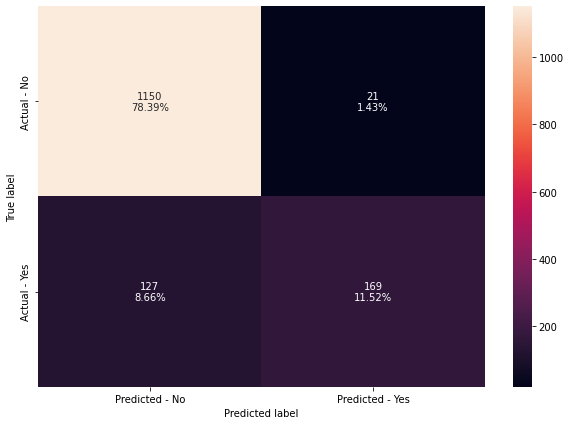

In [97]:
make_confusion_matrix(bag,y_test)

### Insights
- The model is overfitting the train data as train recall is much higher than the test recall.
- The model has low test recall. This implies that the model is not good at identifying customers who can buy package.

### Hyperparameter Tuning

In [98]:
# Choose the type of classifier. 
bag_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              #'max_depth': [1,2,3,4,5], #2,3,4,5,6,7,8,9 combination
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [100],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bag_tuned, parameters, scoring=acc_scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bag_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bag_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=100,
                  random_state=1)

In [99]:
#Using above defined function to get accuracy, recall and precision on train and test set
bag_tuned_score=get_metrics_score(bag_tuned)

Accuracy on training set :  0.9994153756211634
Accuracy on test set :  0.918200408997955
Recall on training set :  0.9967948717948718
Recall on test set :  0.6216216216216216
Precision on training set :  1.0
Precision on test set :  0.9583333333333334
F1 on training set :  0.9983948635634029
F1 on test set :  0.7540983606557377


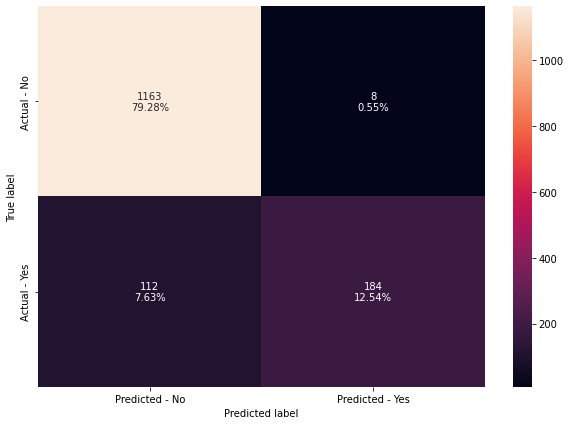

In [100]:
make_confusion_matrix(bag_tuned,y_test)

### Insights
- With tuning parameters, Bagging model has improved in accuracy.
- The model still has low test recall. This implies that the model is not good at identifying customers who can buy package.

### Decision Tree Model

In [101]:
dtree=DecisionTreeClassifier(random_state=1)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [102]:
#Using above defined function to get accuracy, recall and precision on train and test set
dtree_score=get_metrics_score(dtree)

Accuracy on training set :  1.0
Accuracy on test set :  0.9025221540558964
Recall on training set :  1.0
Recall on test set :  0.6959459459459459
Precision on training set :  1.0
Precision on test set :  0.7953667953667953
F1 on training set :  1.0
F1 on test set :  0.7423423423423423


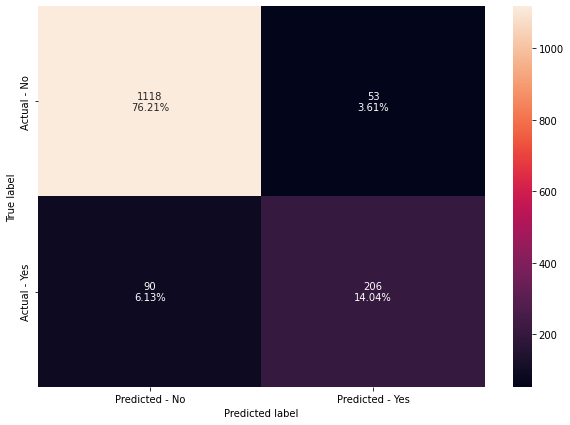

In [103]:
make_confusion_matrix(dtree,y_test)

- The Decision tree model with default parameters is overfitting the train data.
- Recall score for decision tree model is better than bagging model. But it is still low. This implies that the model is not good at identifying customers who can buy package.
- Overall this model is better than tuned Bagging classifier model.

### Hyperparameter Tuning

In [104]:
# Choose the type of classifier. 
dtree_tuned = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': list(np.arange(2,20)) + [None], 
              'min_samples_leaf': [1, 3, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10, 15] + [None],
              'min_impurity_decrease': [0.001, 0.01, 0.1, 0.0]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=acc_scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=19, random_state=1)

In [105]:
#Using above defined function to get accuracy, recall and precision on train and test set
dtree_tuned_score=get_metrics_score(dtree_tuned)

Accuracy on training set :  1.0
Accuracy on test set :  0.9025221540558964
Recall on training set :  1.0
Recall on test set :  0.6959459459459459
Precision on training set :  1.0
Precision on test set :  0.7953667953667953
F1 on training set :  1.0
F1 on test set :  0.7423423423423423


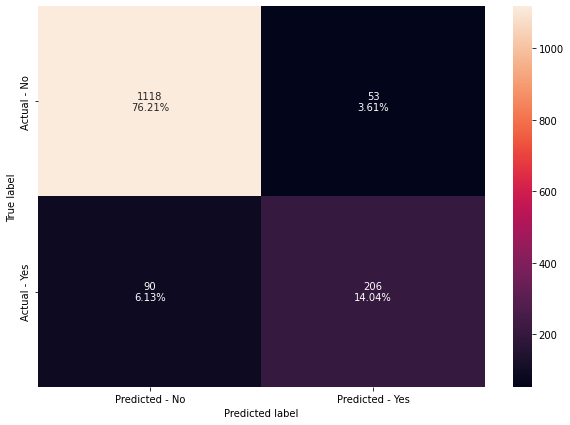

In [106]:
make_confusion_matrix(dtree_tuned,y_test)

- For decision tree model, hyper tuning is not adding much value. Max depth is 19

**Plotting the feature importance of each variable**

In [107]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature.)

print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
DurationOfPitch              0.135490
MonthlyIncome                0.129887
Age                          0.127312
Passport                     0.078662
Designation_Executive        0.073102
NumberOfTrips                0.064701
CityTier                     0.055118
PitchSatisfactionScore       0.051949
NumberOfFollowups            0.040187
PreferredPropertyStar        0.036763
MaritalStatus_Single         0.025855
Gender_Male                  0.023868
MaritalStatus_Unmarried      0.023501
TypeofContact_Self Enquiry   0.022659
NumberOfChildrenVisiting     0.018723
MaritalStatus_Married        0.016467
Occupation_Salaried          0.016433
Occupation_Large Business    0.013019
OwnCar                       0.010870
ProductPitched_Deluxe        0.010303
NumberOfPersonVisiting       0.009866
Designation_Manager          0.007647
Occupation_Small Business    0.002589
Designation_Senior Manager   0.001862
ProductPitched_King          0.001633
ProductPitch

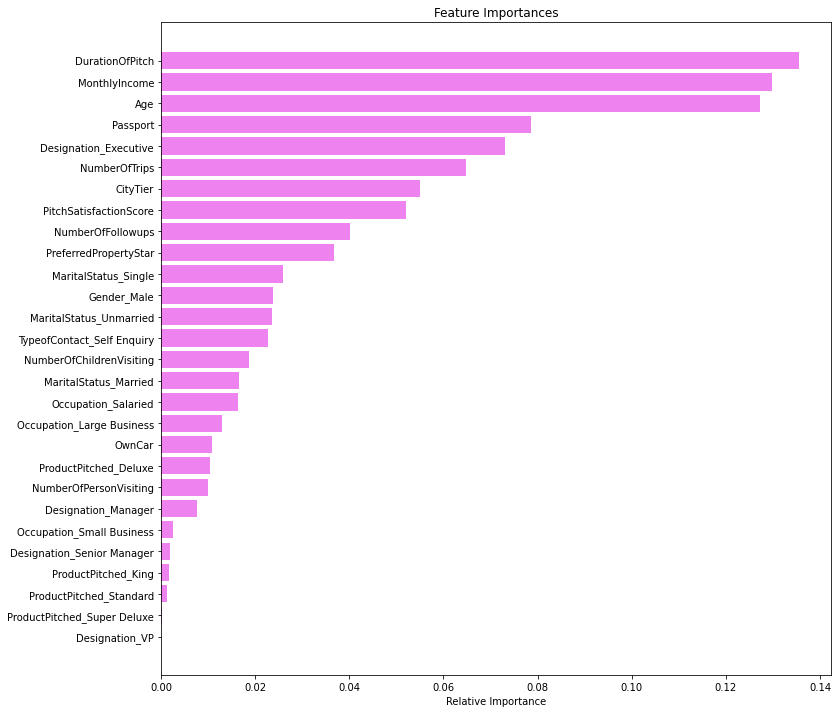

In [108]:
feature_names = X_train.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Duration Of Pitch, MonthlyIncome and Age seems to be most important features deciding whether a customer will take package or not. 

### Random Forest Model

In [109]:
rf=RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [110]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_score=get_metrics_score(rf)

Accuracy on training set :  1.0
Accuracy on test set :  0.8997955010224948
Recall on training set :  1.0
Recall on test set :  0.543918918918919
Precision on training set :  1.0
Precision on test set :  0.930635838150289
F1 on training set :  1.0
F1 on test set :  0.6865671641791045


- Random forest is is also overfitting training data to some extent.
- Recall scrore with Randon Forest is not good. 

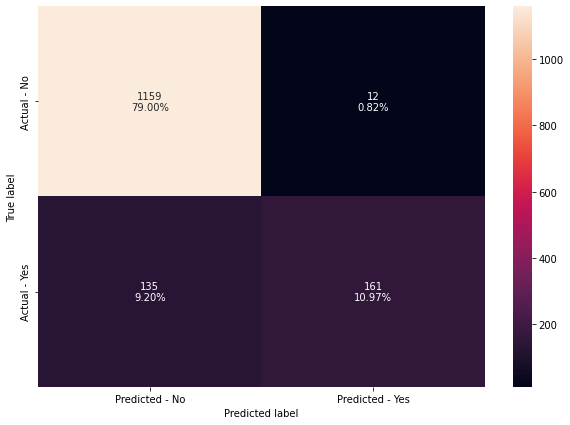

In [111]:
make_confusion_matrix(rf,y_test)

### Hyperparameter Tuning

In [113]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {"n_estimators": [10,30,50,70],
              "max_features": np.arange(0.2, 0.7, 0.1),
              "max_samples": [.8],
              "min_samples_split": [2,5,7]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.6000000000000001, max_samples=0.8,
                       n_estimators=70, random_state=1)

In [114]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_tuned_score=get_metrics_score(rf_tuned)

Accuracy on training set :  0.9988307512423268
Accuracy on test set :  0.9107021131561008
Recall on training set :  0.9935897435897436
Recall on test set :  0.597972972972973
Precision on training set :  1.0
Precision on test set :  0.9365079365079365
F1 on training set :  0.9967845659163987
F1 on test set :  0.7298969072164949


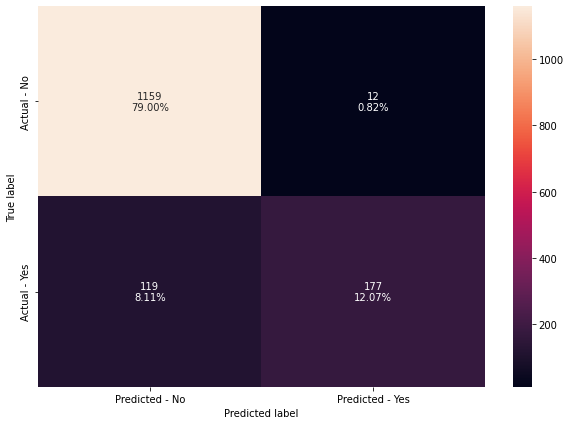

In [115]:
make_confusion_matrix(rf_tuned,y_test)

 - max_features=0.6000000000000001, max_samples=0.8,n_estimators=70, random_state=1
 - No significant change in the result. The result is almost the same before or after the hyperparameter tuning.

In [116]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
Age                          0.133363
MonthlyIncome                0.129180
DurationOfPitch              0.115021
Passport                     0.086605
PitchSatisfactionScore       0.057018
NumberOfTrips                0.056673
NumberOfFollowups            0.055017
Designation_Executive        0.048755
PreferredPropertyStar        0.040235
CityTier                     0.036687
NumberOfChildrenVisiting     0.025538
MaritalStatus_Single         0.025427
TypeofContact_Self Enquiry   0.020102
NumberOfPersonVisiting       0.020075
Gender_Male                  0.019797
MaritalStatus_Unmarried      0.018898
OwnCar                       0.017286
Occupation_Small Business    0.015816
Occupation_Large Business    0.015422
MaritalStatus_Married        0.014137
Occupation_Salaried          0.013434
Designation_Manager          0.009712
ProductPitched_Deluxe        0.008656
Designation_Senior Manager   0.005489
ProductPitched_Standard      0.005145
ProductPitch

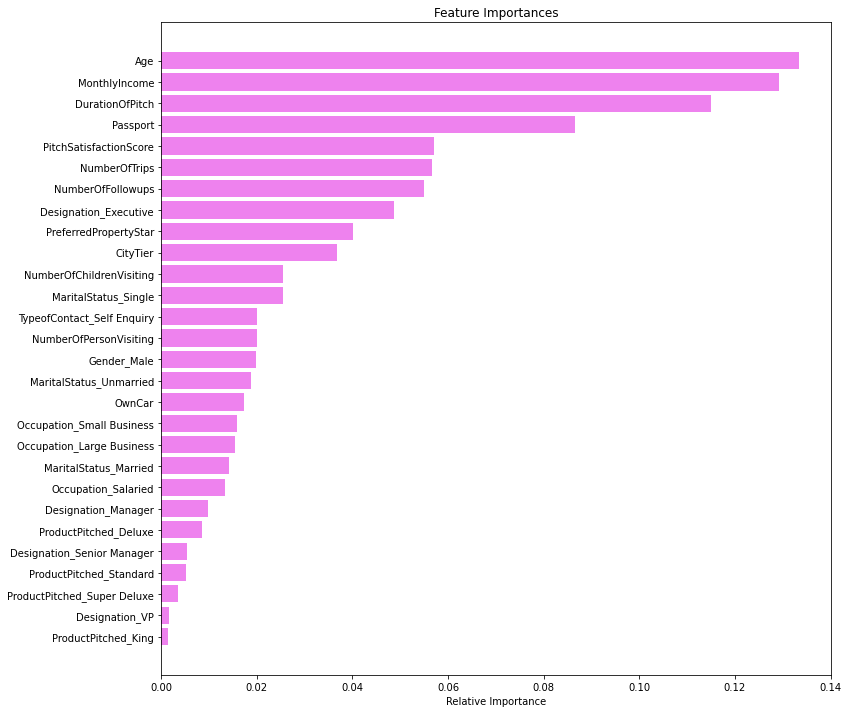

In [117]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Comparing all Bagging models

In [120]:
# defining list of models
bagging_models = [bag, bag_tuned, dtree, dtree_tuned, rf, rf_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
F1_train = []
F1_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in bagging_models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    F1_train.append(np.round(j[6],2))
    F1_test.append(np.round(j[7],2))

In [133]:
comparison_frame = pd.DataFrame({'Model':['Bagging Default','Bagging Tuned', 
                                          'Decision Tree Default','Decision Tree Tuned',
                                          'Random Forest Default','Random Forest Tuned'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1':F1_train,'Test_F1':F1_test
                                  }) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
0,Bagging Default,1.0,0.90,0.97,0.57,1.0,0.89,0.99,0.70
1,Bagging Tuned,1.0,0.92,1.00,0.62,1.0,0.96,1.00,0.75
2,Decision Tree Default,1.0,0.90,1.00,0.70,1.0,0.80,1.00,0.74
3,Decision Tree Tuned,1.0,0.90,1.00,0.70,1.0,0.80,1.00,0.74
4,Random Forest Default,1.0,0.90,1.00,0.54,1.0,0.93,1.00,0.69
5,Random Forest Tuned,1.0,0.91,0.99,0.60,1.0,0.94,1.00,0.73


### Insights
- Decision Tree seems to be better compared to other bagging models. 
- Most of the bagging models are overfitting training data.
- Duration Of Pitch, MonthlyIncome and Age seems to be most important features deciding whether a customer will take package or not. 

## Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Classifier

In [122]:
ab=AdaBoostClassifier(random_state=1)
ab.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [123]:
#Using above defined function to get accuracy, recall and precision on train and test set
ab_score=get_metrics_score(ab)

Accuracy on training set :  0.8544285296696872
Accuracy on test set :  0.8357191547375596
Recall on training set :  0.33814102564102566
Recall on test set :  0.2905405405405405
Precision on training set :  0.7128378378378378
Precision on test set :  0.7350427350427351
F1 on training set :  0.45869565217391306
F1 on test set :  0.4164648910411622


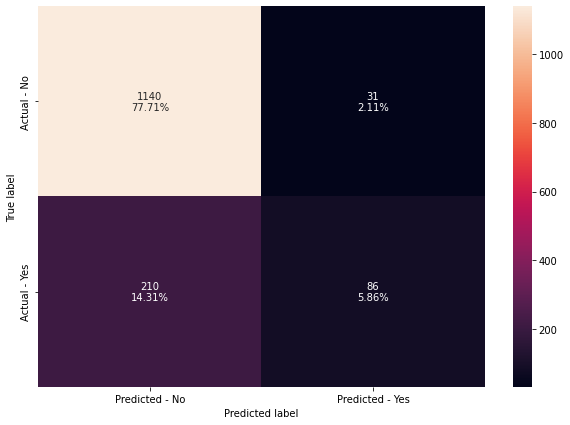

In [124]:
make_confusion_matrix(ab,y_test)

- AdaBoost model has very low test recall. This implies that the model is not good at identifying customers who can buy package.
- This model is not overfitting data.   

### Hyperparameter Tuning

In [125]:
# Choose the type of classifier. 
ab_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(10,100,10), 
              'learning_rate': [1, 0.1, 0.5, 0.01],
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(ab_tuned, parameters, scoring=scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
ab_tuned.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, random_state=1)

In [126]:
#Using above defined function to get accuracy, recall and precision on train and test set
ab_tuned_score=get_metrics_score(ab_tuned)

Accuracy on training set :  0.8544285296696872
Accuracy on test set :  0.8357191547375596
Recall on training set :  0.33814102564102566
Recall on test set :  0.2905405405405405
Precision on training set :  0.7128378378378378
Precision on test set :  0.7350427350427351
F1 on training set :  0.45869565217391306
F1 on test set :  0.4164648910411622


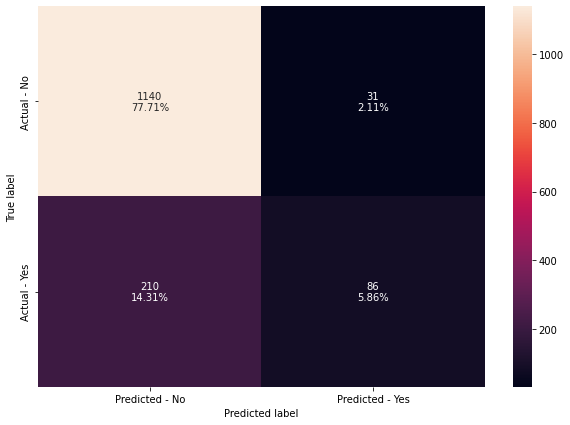

In [127]:
make_confusion_matrix(ab_tuned,y_test)

- We can see that there is no significant improvement in the model after hyperparameter tuning.

### Gradient Boosting Classifier

In [128]:
gb=GradientBoostingClassifier(random_state=1)
gb.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [129]:
#Using above defined function to get accuracy, recall and precision on train and test set
gb_score=get_metrics_score(gb)

Accuracy on training set :  0.889505992399883
Accuracy on test set :  0.8568507157464212
Recall on training set :  0.47435897435897434
Recall on test set :  0.36824324324324326
Precision on training set :  0.8554913294797688
Precision on test set :  0.8257575757575758
F1 on training set :  0.6103092783505155
F1 on test set :  0.5093457943925234


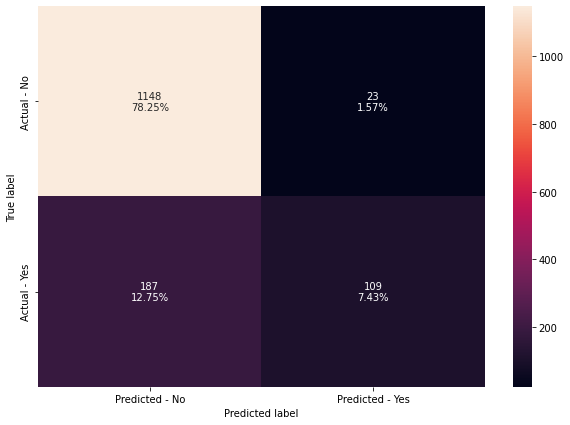

In [130]:
make_confusion_matrix(gb,y_test)

- Gradient boosting is giving slight better performance then AdaBoosting. But still tge recall score is very low.This implies that the model is not good at identifying customers who can buy package.

### Hyperparameter Tuning

In [132]:
# Choose the type of classifier. 
gb_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': [75,100,125,150],  
              'subsample':[0.7,0.8,0.9,1],
              'max_features':[0.7,0.8,0.9,1],
              'max_depth':[3,5,7,10]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gb_tuned.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=7, max_features=0.8, n_estimators=150,
                           random_state=1, subsample=1)

In [134]:
#Using above defined function to get accuracy, recall and precision on train and test set
gb_tuned_score=get_metrics_score(gb_tuned)

Accuracy on training set :  1.0
Accuracy on test set :  0.9393319700068167
Recall on training set :  1.0
Recall on test set :  0.7331081081081081
Precision on training set :  1.0
Precision on test set :  0.9559471365638766
F1 on training set :  1.0
F1 on test set :  0.829827915869981


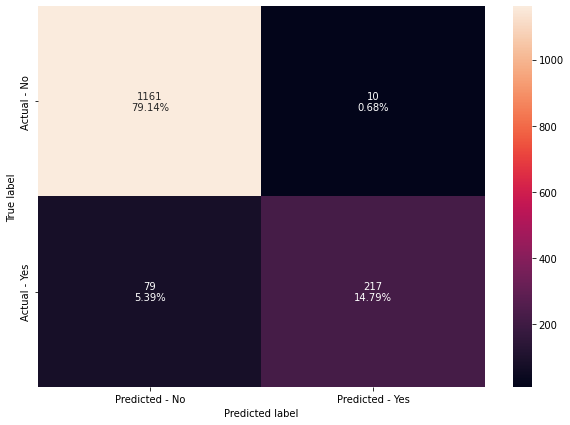

In [135]:
make_confusion_matrix(gb_tuned,y_test)

- GradientBoostingClassifier has improved model performance with tuned parameters. 
  - GradientBoostingClassifier(max_depth=7, max_features=0.8, n_estimators=150, random_state=1, subsample=1)
- After tuning Gradient boost model, the recall score of the model has improved significantly. 


In [136]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature.

print(pd.DataFrame(gb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
MonthlyIncome                0.136731
DurationOfPitch              0.134316
Age                          0.124552
Passport                     0.094938
Designation_Executive        0.062583
PitchSatisfactionScore       0.059599
NumberOfFollowups            0.051696
NumberOfTrips                0.049473
PreferredPropertyStar        0.046040
CityTier                     0.042703
MaritalStatus_Single         0.021340
Gender_Male                  0.020012
TypeofContact_Self Enquiry   0.018502
Occupation_Large Business    0.018439
MaritalStatus_Unmarried      0.017356
Occupation_Small Business    0.014153
NumberOfPersonVisiting       0.011141
Designation_Manager          0.010474
MaritalStatus_Married        0.010334
NumberOfChildrenVisiting     0.009940
Occupation_Salaried          0.009597
ProductPitched_Deluxe        0.008012
OwnCar                       0.007784
ProductPitched_Standard      0.007161
Designation_Senior Manager   0.006116
ProductPitch

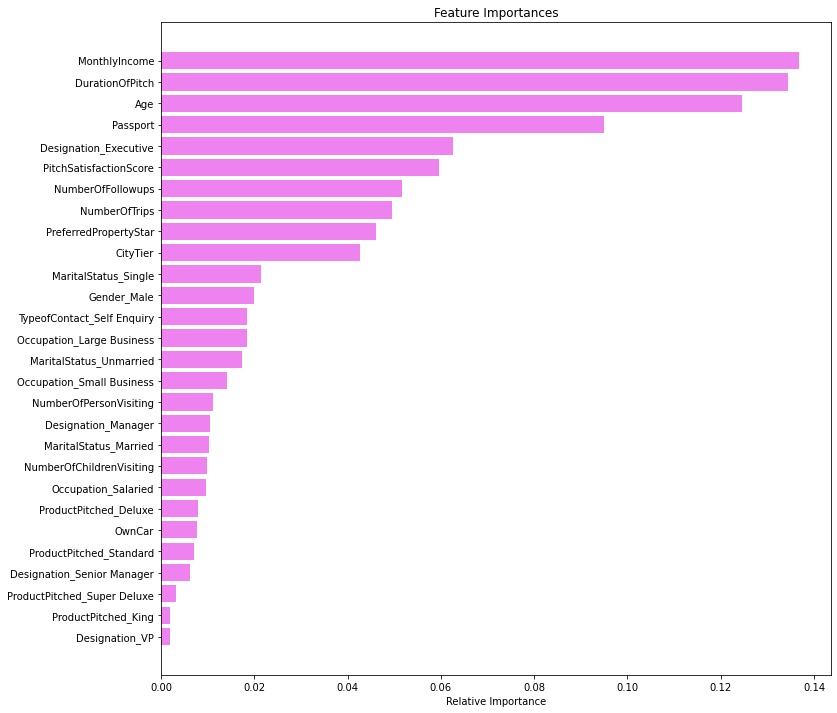

In [137]:
feature_names = X_train.columns
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Duration Of Pitch, MonthlyIncome and Age still seems to be most important features deciding whether a customer will take package or not. 

### XGBoost Classifier

In [138]:
xgb=XGBClassifier(random_state=1, verbosity = 0)
xgb.fit(X_train,y_train)

XGBClassifier(random_state=1, verbosity=0)

In [139]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  0.881613563285589
Accuracy on test set :  0.8513974096796183
Recall on training set :  0.4230769230769231
Recall on test set :  0.34797297297297297
Precision on training set :  0.8543689320388349
Precision on test set :  0.8046875
F1 on training set :  0.5659163987138264
F1 on test set :  0.4858490566037736


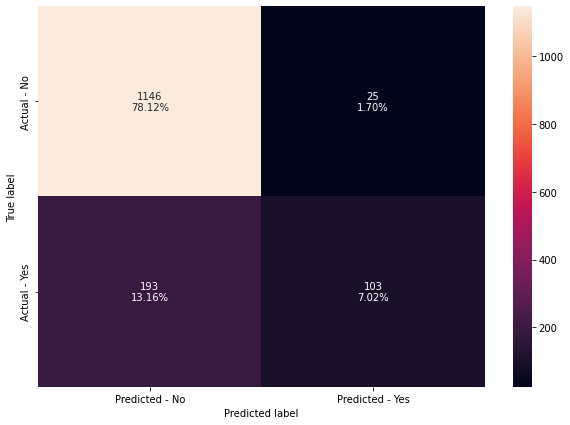

In [141]:
make_confusion_matrix(xgb,y_test)

- XGBoost with default parameters is not prforming well. It is not overfitting the model but the recall score is very low.

### Hyperparameter Tuning

In [143]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, verbosity = 0)

# Grid of parameters to choose from
parameters = {'n_estimators': [75,100,125,150], 
              'subsample':[0.7, 0.8, 0.9, 1],
              'gamma':[0, 1, 3, 5],
              'colsample_bytree':[0.7, 0.8, 0.9, 1],
              'colsample_bylevel':[0.7, 0.8, 0.9, 1]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
xgb_tuned.fit(X_train, y_train)

XGBClassifier(colsample_bylevel=0.8, n_estimators=150, random_state=1,
              subsample=0.8, verbosity=0)

In [144]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_tuned_score=get_metrics_score(xgb_tuned)

Accuracy on training set :  0.9006138555977784
Accuracy on test set :  0.8609406952965235
Recall on training set :  0.5272435897435898
Recall on test set :  0.3952702702702703
Precision on training set :  0.8796791443850267
Precision on test set :  0.823943661971831
F1 on training set :  0.6593186372745492
F1 on test set :  0.5342465753424658


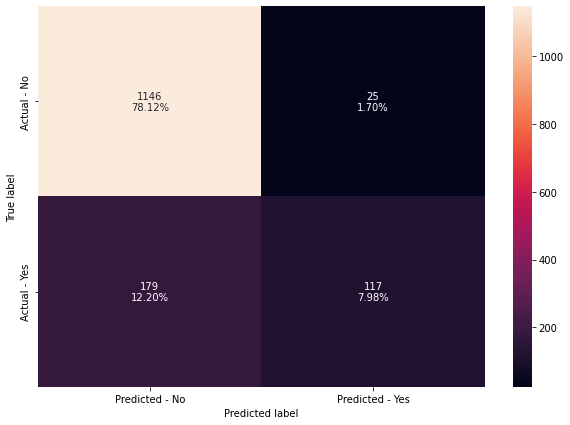

In [145]:
make_confusion_matrix(xgb_tuned,y_test)

In [146]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature.)

print(pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
Designation_Executive        0.123197
Passport                     0.107509
MaritalStatus_Single         0.063539
Designation_Senior Manager   0.061066
CityTier                     0.043209
PreferredPropertyStar        0.038662
MaritalStatus_Unmarried      0.036558
Occupation_Large Business    0.035535
ProductPitched_Standard      0.035316
NumberOfFollowups            0.034680
Age                          0.034476
TypeofContact_Self Enquiry   0.030823
MaritalStatus_Married        0.030684
ProductPitched_Deluxe        0.030489
DurationOfPitch              0.029910
ProductPitched_Super Deluxe  0.029035
MonthlyIncome                0.028617
PitchSatisfactionScore       0.027048
Gender_Male                  0.026851
NumberOfTrips                0.024458
Occupation_Small Business    0.023889
OwnCar                       0.022373
Occupation_Salaried          0.020186
Designation_Manager          0.017247
NumberOfPersonVisiting       0.016538
ProductPitch

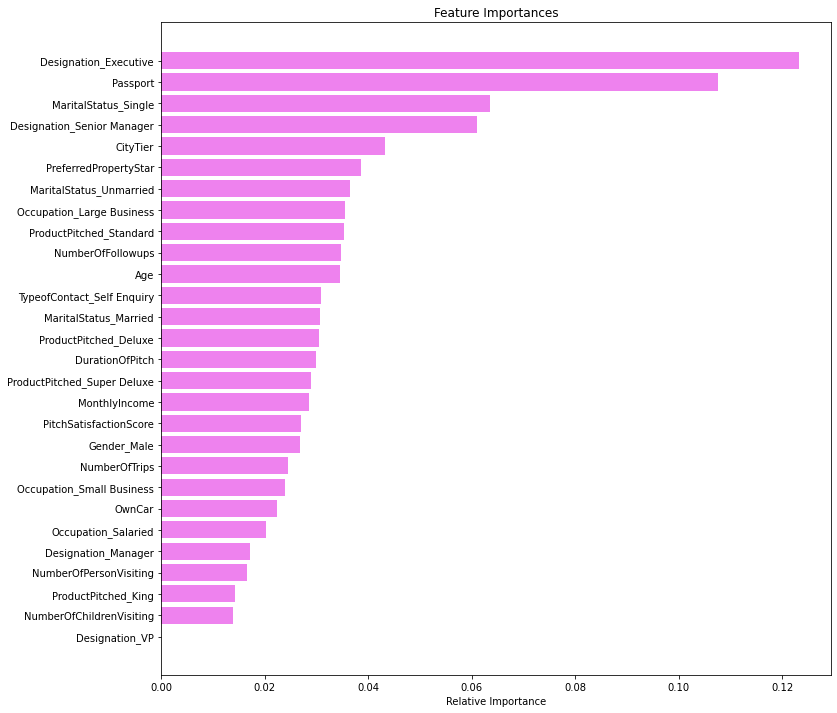

In [147]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- In XGBoost, workingday is the most important feature followed by features - hr and yr

## Comparing all Boosting models

In [148]:
# defining list of models
models = [ab, ab_tuned, gb, gb_tuned, xgb, xgb_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
F1_train = []
F1_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    F1_train.append(np.round(j[6],2))
    F1_test.append(np.round(j[7],2))

In [150]:
comparison_frame = pd.DataFrame({'Model':['AdaBoosting Default','AdaBoosting Tuned', 
                                          'Gradient Boosting default ','Gradient Boosting Tuned',
                                          'XGB Default','XGB Default Tuned'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1':F1_train,'Test_F1':F1_test
                                  }) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
0,AdaBoosting Default,0.85,0.84,0.34,0.29,0.71,0.74,0.46,0.42
1,AdaBoosting Tuned,0.85,0.84,0.34,0.29,0.71,0.74,0.46,0.42
2,Gradient Boosting default,0.89,0.86,0.47,0.37,0.86,0.83,0.61,0.51
3,Gradient Boosting Tuned,1.00,0.94,1.00,0.73,1.00,0.96,1.00,0.83
4,XGB Default,0.88,0.85,0.42,0.35,0.85,0.80,0.57,0.49
5,XGB Default Tuned,0.90,0.86,0.53,0.40,0.88,0.82,0.66,0.53


### Insights
- Tuned Gradient Boosting seems to be better compared to other boosting models. 
- Duration Of Pitch, MonthlyIncome and Age seems to be most important features deciding whether a customer will take package or not. 

## Stacking Model

**Build a stacking model with the tuned models - decision tree, random forest, Ada Boosting and gradient boosting, then use XGBoost to get the final prediction.**

In [162]:
estimators=[('Decision Tree Tuned', dtree_tuned),('Random Forest Tuned', rf_tuned),('Ada Boosting Tuned', ab_tuned),('Gradient Boosting Tuned', gb_tuned)]
final_estimator=XGBClassifier(random_state=1)

In [163]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=3)
stacking_estimator.fit(X_train,y_train)

StackingClassifier(cv=3,
                   estimators=[('Decision Tree Tuned',
                                DecisionTreeClassifier(max_depth=19,
                                                       random_state=1)),
                               ('Random Forest Tuned',
                                RandomForestClassifier(max_features=0.6000000000000001,
                                                       max_samples=0.8,
                                                       n_estimators=70,
                                                       random_state=1)),
                               ('Ada Boosting Tuned',
                                AdaBoostClassifier(learning_rate=1,
                                                   random_state=1)),
                               ('Gradient Boosting Tuned',
                                GradientBoostingClassifier(max_depth=7,
                                                           max_features=0.8,
                   

In [164]:
#Using above defined function to get accuracy, recall and precision on train and test set
stacking_estimator_score=get_metrics_score(stacking_estimator)

Accuracy on training set :  0.9994153756211634
Accuracy on test set :  0.9393319700068167
Recall on training set :  1.0
Recall on test set :  0.7668918918918919
Precision on training set :  0.9968051118210862
Precision on test set :  0.9190283400809717
F1 on training set :  0.9984
F1 on test set :  0.8360957642725599


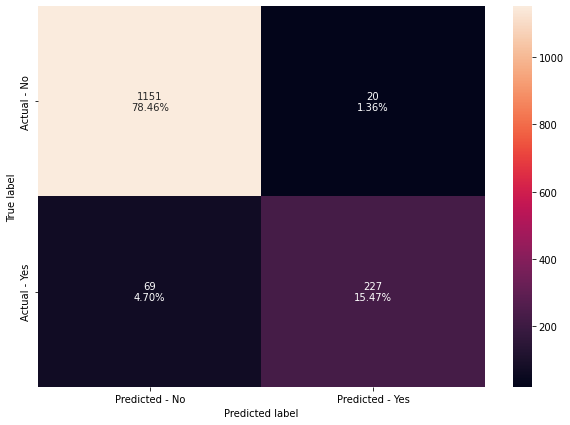

In [165]:
make_confusion_matrix(stacking_estimator,y_test)

## Comparing all models

In [166]:
# defining list of models
models = [bag, bag_tuned, dtree, dtree_tuned, rf, rf_tuned,ab, ab_tuned, gb, gb_tuned, xgb, xgb_tuned,stacking_estimator]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
F1_train = []
F1_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    F1_train.append(np.round(j[6],2))
    F1_test.append(np.round(j[7],2))

In [167]:
comparison_frame = pd.DataFrame({'Model':['Bagging Default','Bagging Tuned', 
                                          'Decision Tree Default','Decision Tree Tuned',
                                          'Random Forest Default','Random Forest Tuned',
                                          'AdaBoosting Default','AdaBoosting Tuned', 
                                          'Gradient Boosting default ','Gradient Boosting Tuned',
                                          'XGB Default','XGB Tuned','Stacking Estimator'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1':F1_train,'Test_F1':F1_test
                                  }) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
0,Bagging Default,1.00,0.90,0.97,0.57,1.00,0.89,0.99,0.70
1,Bagging Tuned,1.00,0.92,1.00,0.62,1.00,0.96,1.00,0.75
2,Decision Tree Default,1.00,0.90,1.00,0.70,1.00,0.80,1.00,0.74
3,Decision Tree Tuned,1.00,0.90,1.00,0.70,1.00,0.80,1.00,0.74
4,Random Forest Default,1.00,0.90,1.00,0.54,1.00,0.93,1.00,0.69
5,Random Forest Tuned,1.00,0.91,0.99,0.60,1.00,0.94,1.00,0.73
6,AdaBoosting Default,0.85,0.84,0.34,0.29,0.71,0.74,0.46,0.42
7,AdaBoosting Tuned,0.85,0.84,0.34,0.29,0.71,0.74,0.46,0.42
8,Gradient Boosting default,0.89,0.86,0.47,0.37,0.86,0.83,0.61,0.51
9,Gradient Boosting Tuned,1.00,0.94,1.00,0.73,1.00,0.96,1.00,0.83


- Stacking model is the best models here. It has the highest test recall score of approx 77%.
- Stacking classifier, Tuned Gradient boosting and tuned decision tree are the top 3 models. They are all giving a similar performance on recall score.

## Conclusions and Business Recommendations

- There are good number of returning customers for this company. More emphasis can be be made for review and mouth to mouth publicity to sell more packages.
- There are more self inquiries compared to company invited. With above recommendation, company can leaverage customer feedback to attract more customers.
- Tier 1 cities has more customers compare Tier3. And Tier3 has more customers compared to Tier2. More emphassis with package pricing can be made to get good participation form Tier 2 cities. 
- Salaried and Small business individuals are main customers opting for travel packges. Less participation form Large Business. Trying to get contact from Large business and inviting them from company may be an option to increase participation.
- Basic and Deluxe seems to be more popular packages then Standard, Super Deluxe and King. Basic packages can be pitched to Tier2 and Tiere3 city customers.  
- Married cutomers have more participation than other categories.  
- DurationOfPitch is an important attribute which decides whether customer will take package or not. With right training for company agents, correct packages can be pitched to right income group to increase package sell.
- Basic prodcut category seems to have higher rate of acceptance based on Product Pitched. 
- Percentage of Executive designated customers opting for package is higher compared to others. More focus can be given to Ececutives. 
- Super Deluxe and King packages acceptance between higher MonthlyIncome and Age group.